# TITANIC SURVIVAL PREDICTION

In [1]:
#This program predicts if a passenger will survive on the titanic

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
175,176,0,3,"Klasen, Mr. Klas Albin",male,18.0,1,1,350404,7.8542,NaN,S


In [10]:
df.shape

(891, 12)

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

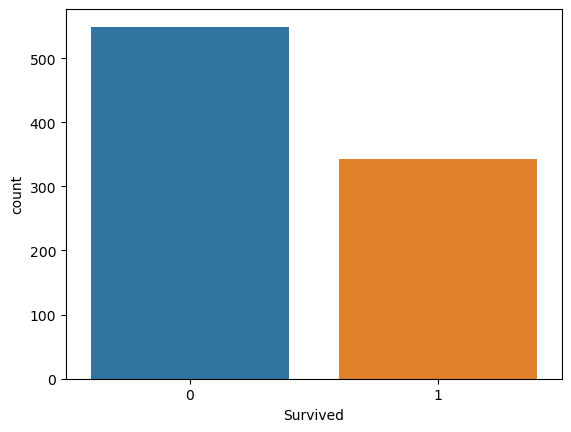

In [13]:
sns.countplot(df['Survived'])

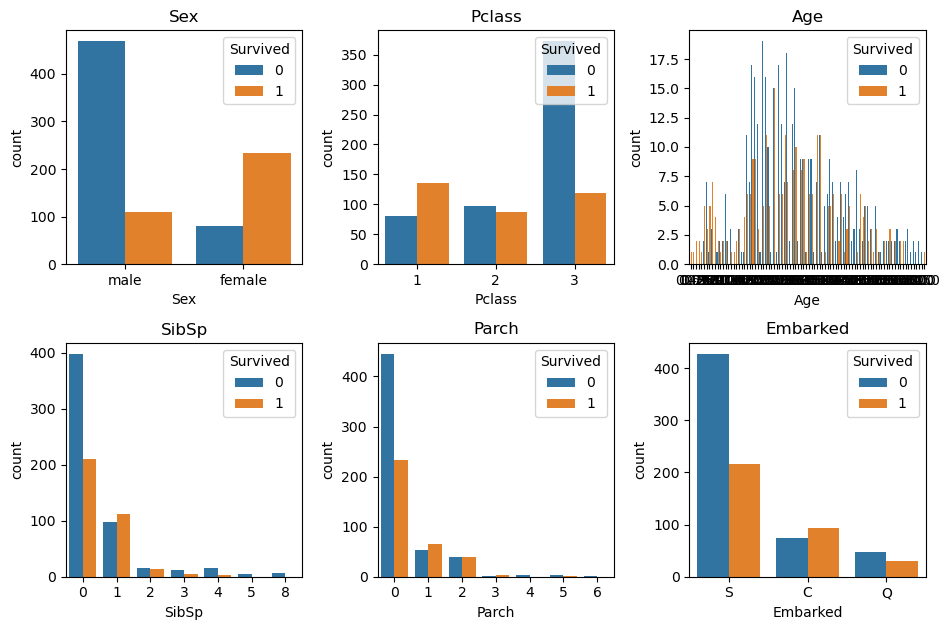

In [14]:
cols = ['Sex','Pclass','Age','SibSp','Parch','Embarked']
n_rows = 2
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.2, n_rows*3.2))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i=r*n_cols+c
        ax=axs[r][c]
        sns.countplot(df[cols[i]],hue=df['Survived'],ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='Survived',loc='upper right')
       
plt.tight_layout()

In [15]:
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [16]:
df.pivot_table('Survived',index='Sex',columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<AxesSubplot:xlabel='Sex'>

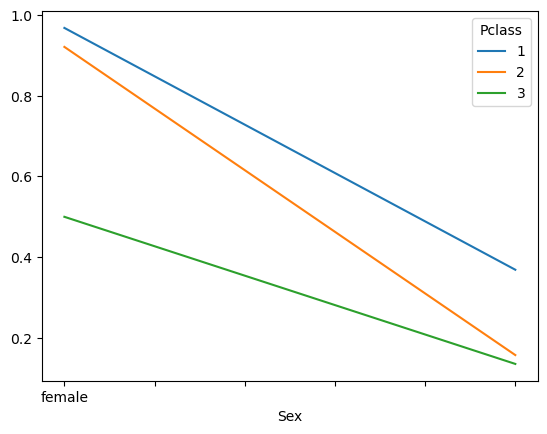

In [17]:
df.pivot_table('Survived',index='Sex',columns='Pclass').plot()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

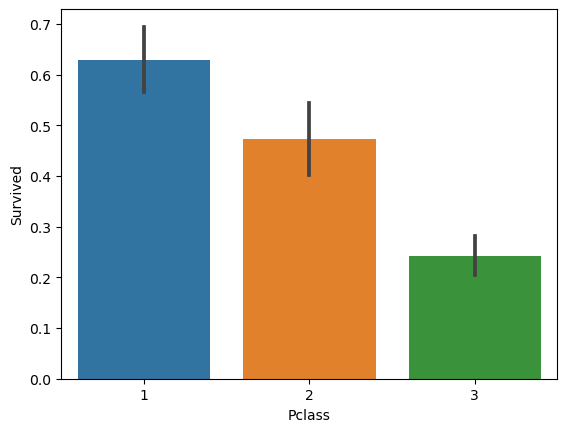

In [18]:
sns.barplot(x='Pclass',y='Survived',data=df)

In [19]:
Age=pd.cut(df['Age'],[0,18,80])
df.pivot_table('Survived',['Sex',Age],'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

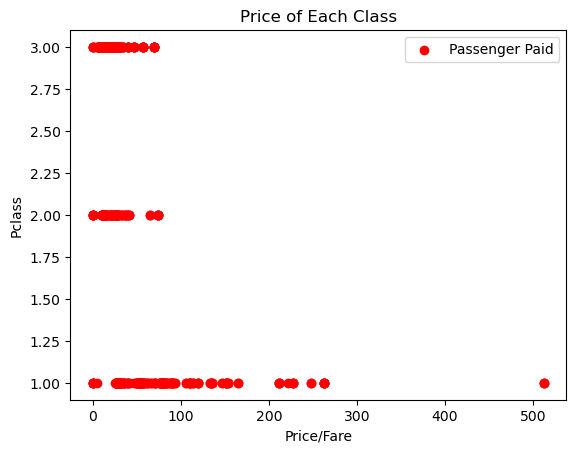

In [20]:
plt.scatter(df['Fare'],df['Pclass'],color='red',label='Passenger Paid')
plt.ylabel('Pclass')
plt.xlabel('Price/Fare')
plt.title('Price of Each Class')
plt.legend()
plt.show()

In [21]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


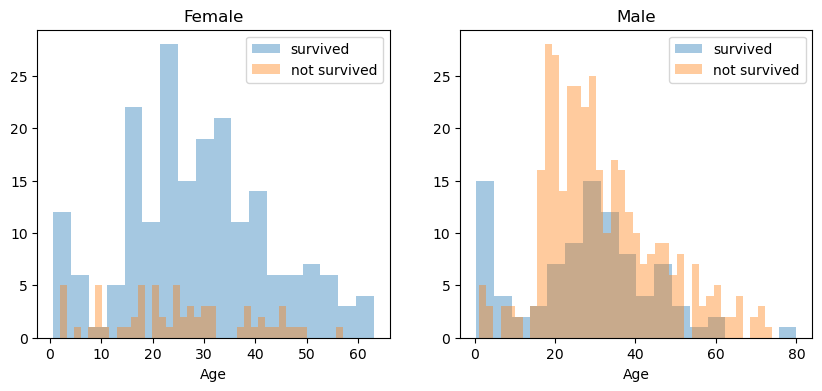

In [23]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df[df['Sex']=='female']
men = df[df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

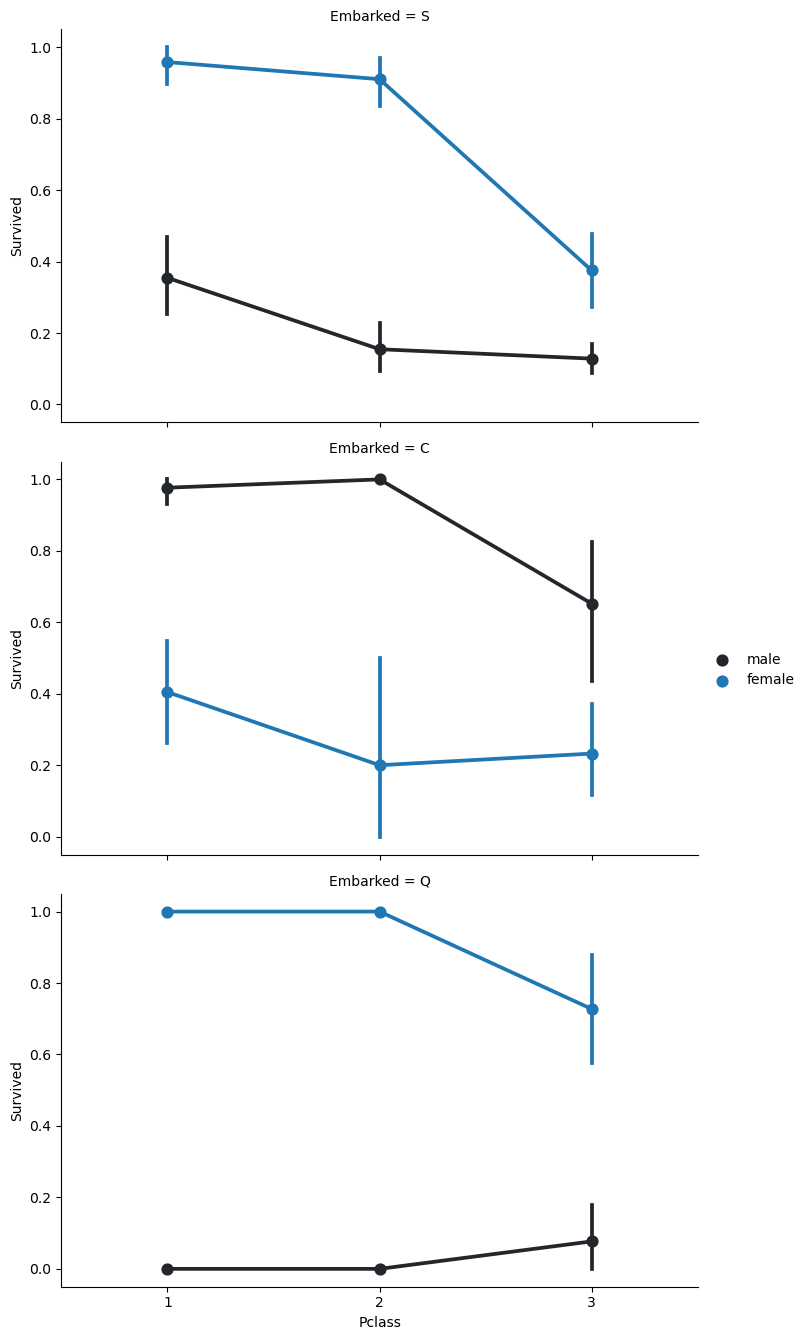

In [24]:
FacetGrid = sns.FacetGrid(df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

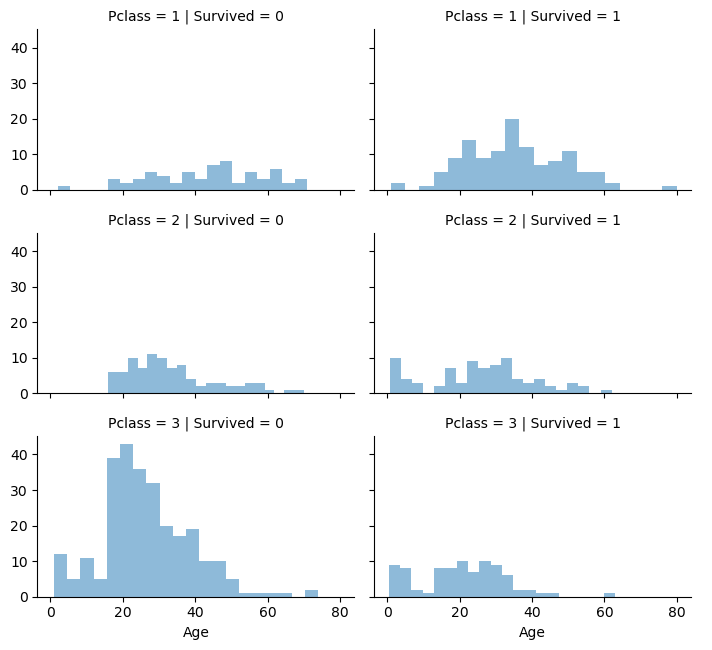

In [25]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [27]:
data = [df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

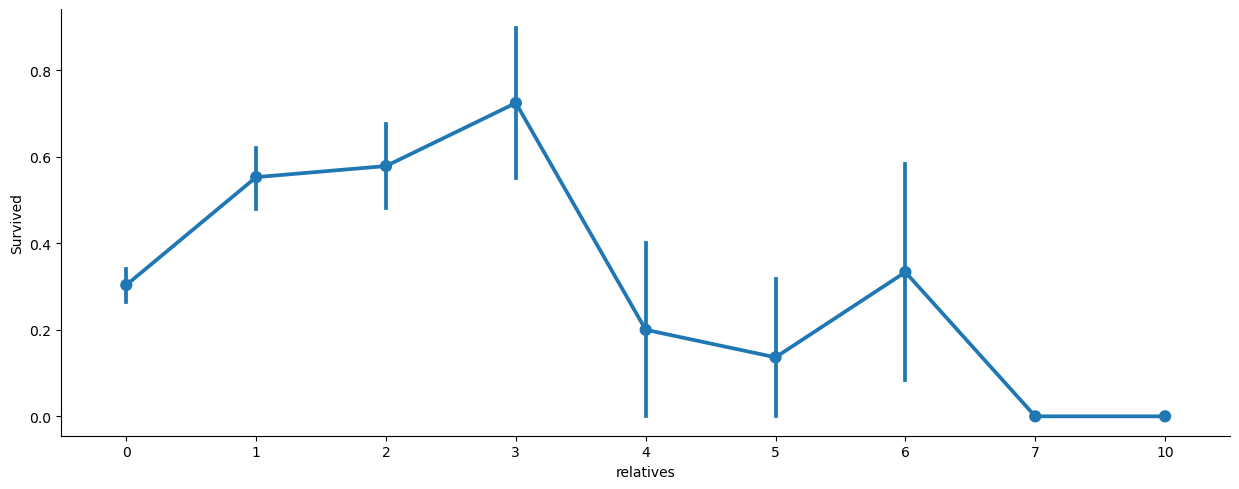

In [28]:
axes = sns.factorplot('relatives','Survived', data=df, aspect = 2.5, )

In [30]:
df = df.drop(['PassengerId'], axis=1)

In [32]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [33]:
common_value = 'S'
data = [df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        714 non-null    float64
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Cabin      204 non-null    object 
 10  Embarked   891 non-null    object 
 11  relatives  891 non-null    int64  
 12  not_alone  891 non-null    int32  
dtypes: float64(2), int32(1), int64(5), object(5)
memory usage: 87.1+ KB


In [39]:
df['Ticket'].describe()


count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [41]:
df = df.drop(['Ticket'], axis=1)

In [45]:
df=df.drop(['Age','Cabin','Embarked'],axis=1)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Survived   891 non-null    int64
 1   Pclass     891 non-null    int64
 2   Sex        891 non-null    int64
 3   SibSp      891 non-null    int64
 4   Parch      891 non-null    int64
 5   Fare       891 non-null    int32
 6   relatives  891 non-null    int64
 7   not_alone  891 non-null    int32
 8   Title      891 non-null    int64
dtypes: int32(2), int64(7)
memory usage: 55.8 KB


In [47]:
for val in df:
    print(df[val].value_counts())
    print()

0    549
1    342
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

0    577
1    314
Name: Sex, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

7     213
8      70
26     57
13     50
10     28
     ... 
59      1
81      1
4       1
75      1
5       1
Name: Fare, Length: 91, dtype: int64

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: relatives, dtype: int64

1    537
0    354
Name: not_alone, dtype: int64

1    517
2    185
3    126
4     40
5     23
Name: Title, dtype: int64



In [48]:
df.corr()

,Survived,Pclass,Sex,SibSp,Parch,Fare,relatives,not_alone,Title
Survived,1.000000,-0.338481,0.543351,-0.035322,0.081629,0.257482,0.016639,-0.203367,0.407753
Pclass,-0.338481,1.000000,-0.131900,0.083081,0.018443,-0.550553,0.065997,0.135207,-0.173929
Sex,0.543351,-0.131900,1.000000,0.114631,0.245489,0.182331,0.200988,-0.303646,0.502713
SibSp,-0.035322,0.083081,0.114631,1.000000,0.414838,0.159506,0.890712,-0.584471,0.269623
Parch,0.081629,0.018443,0.245489,0.414838,1.000000,0.216252,0.783111,-0.583398,0.315784
Fare,0.257482,-0.550553,0.182331,0.159506,0.216252,1.000000,0.217052,-0.272355,0.136489
relatives,0.016639,0.065997,0.200988,0.890712,0.783111,0.217052,1.000000,-0.690922,0.342039
not_alone,-0.203367,0.135207,-0.303646,-0.584471,-0.583398,-0.272355,-0.690922,1.000000,-0.405813
Title,0.407753,-0.173929,0.502713,0.269623,0.315784,0.136489,0.342039,-0.405813,1.000000


In [49]:
df['Sex'].replace(['male','female'],[1,0], inplace=True)

In [50]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,relatives,not_alone,Title
0,0,3,0,1,0,7,1,0,1
1,1,1,1,1,0,71,1,0,3
2,1,3,1,0,0,7,0,1,2
3,1,1,1,1,0,53,1,0,3
4,0,3,0,0,0,8,0,1,1


In [51]:
X=df.iloc[:,1:6].values
Y=df.iloc[:,0].values

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=0)

In [56]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()
logreg.fit(X_train,Y_train)

LogisticRegression()

In [57]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [58]:
def models(X_train, Y_train):
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(random_state=0)
    log.fit(X_train, Y_train)
    
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
    knn.fit(X_train, Y_train)
    
    from sklearn.svm import SVC
    svc_lin=SVC(kernel='linear',random_state=0)
    svc_lin.fit(X_train,Y_train)
    
    from sklearn.svm import SVC
    svc_rbf=SVC(kernel='rbf',random_state=0)
    svc_rbf.fit(X_train,Y_train)
    
    from sklearn.naive_bayes import GaussianNB
    gauss=GaussianNB()
    gauss.fit(X_train,Y_train)
    
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    tree.fit(X_train,Y_train)
    
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    forest.fit(X_train,Y_train)
    
    print('[0]Logistic Regression Training Accuracy: ',log.score(X_train,Y_train))
    print('[1]K Neighbors Training Accuracy: ',knn.score(X_train,Y_train))
    print('[2]SVC Linear Training Accuracy: ',svc_lin.score(X_train,Y_train))
    print('[3]SVC RBF Training Accuracy: ',svc_rbf.score(X_train,Y_train))
    print('[4]Guaasian NB Training Accuracy: ',gauss.score(X_train,Y_train))
    print('[5]Decision Tree Training Accuracy: ',tree.score(X_train,Y_train))
    print('[6]Random Forest Training Accuracy: ',forest.score(X_train,Y_train))
    
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [59]:
model=models(X_train,Y_train)

[0]Logistic Regression Training Accuracy:  0.7991573033707865
[1]K Neighbors Training Accuracy:  0.8426966292134831
[2]SVC Linear Training Accuracy:  0.7865168539325843
[3]SVC RBF Training Accuracy:  0.8103932584269663
[4]Guaasian NB Training Accuracy:  0.7879213483146067
[5]Decision Tree Training Accuracy:  0.8918539325842697
[6]Random Forest Training Accuracy:  0.8862359550561798


In [60]:
logreg= LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)

In [61]:
print (X_test)
print (Y_pred)

[[ 8.60229473e-01 -7.73443137e-01 -5.31326713e-01 -4.60066276e-01
  -3.99876726e-01]
 [ 8.60229473e-01 -7.73443137e-01 -5.31326713e-01 -4.60066276e-01
  -5.46082019e-01]
 [ 8.60229473e-01 -7.73443137e-01  3.74316684e+00  8.89964272e-01
  -8.65796705e-02]
 [-1.50871015e+00  1.29291987e+00  5.37296676e-01 -4.60066276e-01
   2.35713736e+00]
 [ 8.60229473e-01  1.29291987e+00 -5.31326713e-01  2.23999482e+00
  -3.78990256e-01]
 [-1.50871015e+00 -7.73443137e-01 -5.31326713e-01 -4.60066276e-01
  -6.56932001e-02]
 [-1.50871015e+00  1.29291987e+00 -5.31326713e-01 -4.60066276e-01
   2.50334266e+00]
 [-1.50871015e+00  1.29291987e+00 -5.31326713e-01  2.23999482e+00
   2.73309383e+00]
 [-1.50871015e+00 -7.73443137e-01  5.37296676e-01 -4.60066276e-01
   1.20838149e+00]
 [ 8.60229473e-01  1.29291987e+00 -5.31326713e-01 -4.60066276e-01
  -5.46082019e-01]
 [ 8.60229473e-01 -7.73443137e-01  5.37296676e-01 -4.60066276e-01
  -5.46082019e-01]
 [-3.24240340e-01  1.29291987e+00 -5.31326713e-01 -4.60066276e-01

In [62]:
from sklearn import metrics
from sklearn.metrics import classification_report
print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))
print('CL Report: ',metrics.classification_report(Y_test, Y_pred, zero_division=1))

Accuracy:  0.7932960893854749
CL Report:                precision    recall  f1-score   support

           0       0.81      0.86      0.84       110
           1       0.76      0.68      0.72        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



In [63]:
df.corr()

,Survived,Pclass,Sex,SibSp,Parch,Fare,relatives,not_alone,Title
Survived,1.000000,-0.338481,0.543351,-0.035322,0.081629,0.257482,0.016639,-0.203367,0.407753
Pclass,-0.338481,1.000000,-0.131900,0.083081,0.018443,-0.550553,0.065997,0.135207,-0.173929
Sex,0.543351,-0.131900,1.000000,0.114631,0.245489,0.182331,0.200988,-0.303646,0.502713
SibSp,-0.035322,0.083081,0.114631,1.000000,0.414838,0.159506,0.890712,-0.584471,0.269623
Parch,0.081629,0.018443,0.245489,0.414838,1.000000,0.216252,0.783111,-0.583398,0.315784
Fare,0.257482,-0.550553,0.182331,0.159506,0.216252,1.000000,0.217052,-0.272355,0.136489
relatives,0.016639,0.065997,0.200988,0.890712,0.783111,0.217052,1.000000,-0.690922,0.342039
not_alone,-0.203367,0.135207,-0.303646,-0.584471,-0.583398,-0.272355,-0.690922,1.000000,-0.405813
Title,0.407753,-0.173929,0.502713,0.269623,0.315784,0.136489,0.342039,-0.405813,1.000000


In [64]:
x=df.iloc[:,1:6]
y=df.iloc[:,-1]

<AxesSubplot:>

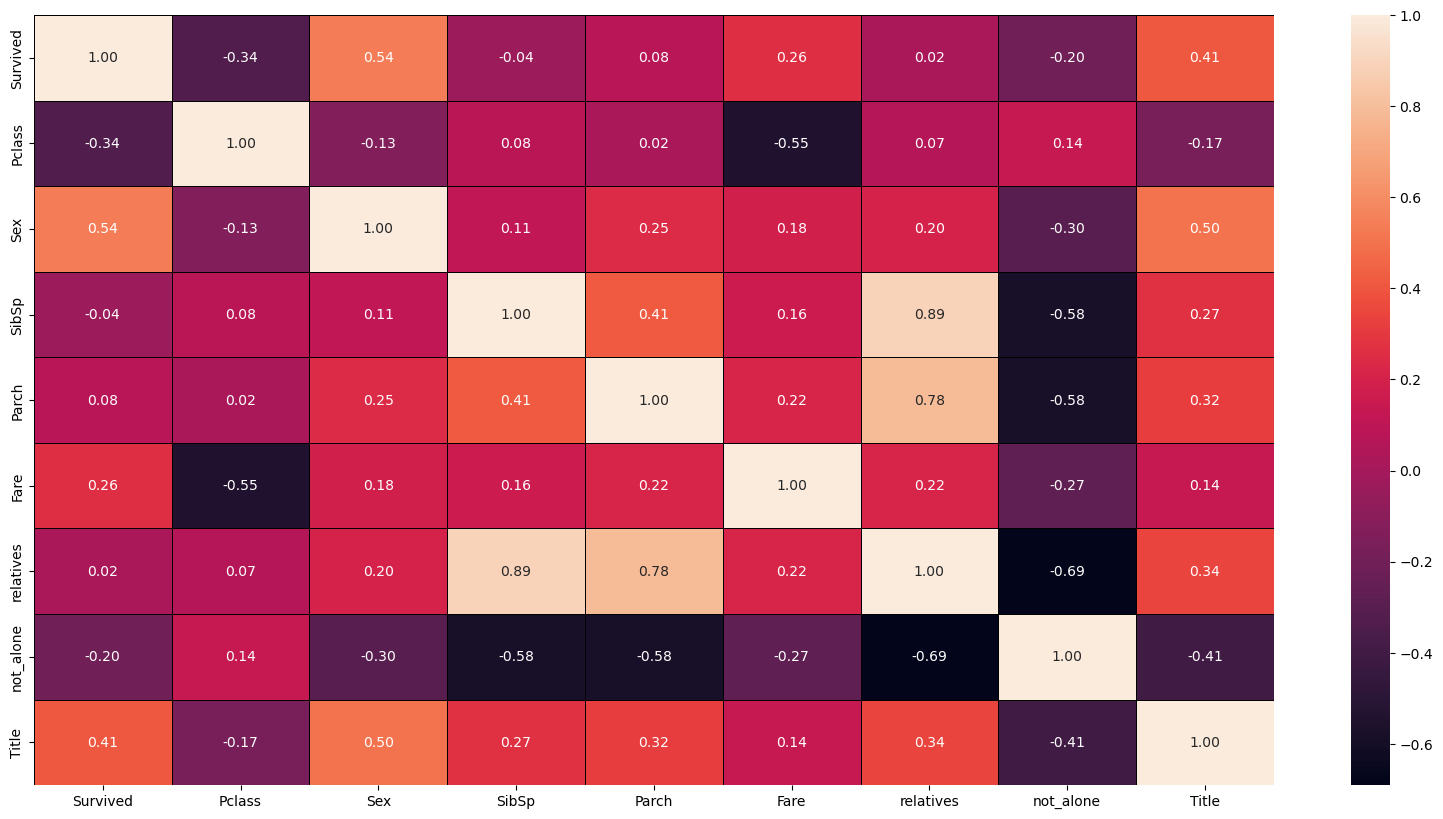

In [65]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, linecolor='black', fmt='.2f')

In [66]:
df.describe()

,Survived,Pclass,Sex,SibSp,Parch,Fare,relatives,not_alone,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,0.523008,0.381594,31.785634,0.904602,0.602694,1.728395
std,0.486592,0.836071,0.477990,1.102743,0.806057,49.703730,1.613459,0.489615,1.030039
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,1.000000
50%,0.000000,3.000000,0.000000,0.000000,0.000000,14.000000,0.000000,1.000000,1.000000
75%,1.000000,3.000000,1.000000,1.000000,0.000000,31.000000,1.000000,1.000000,2.000000
max,1.000000,3.000000,1.000000,8.000000,6.000000,512.000000,10.000000,1.000000,5.000000


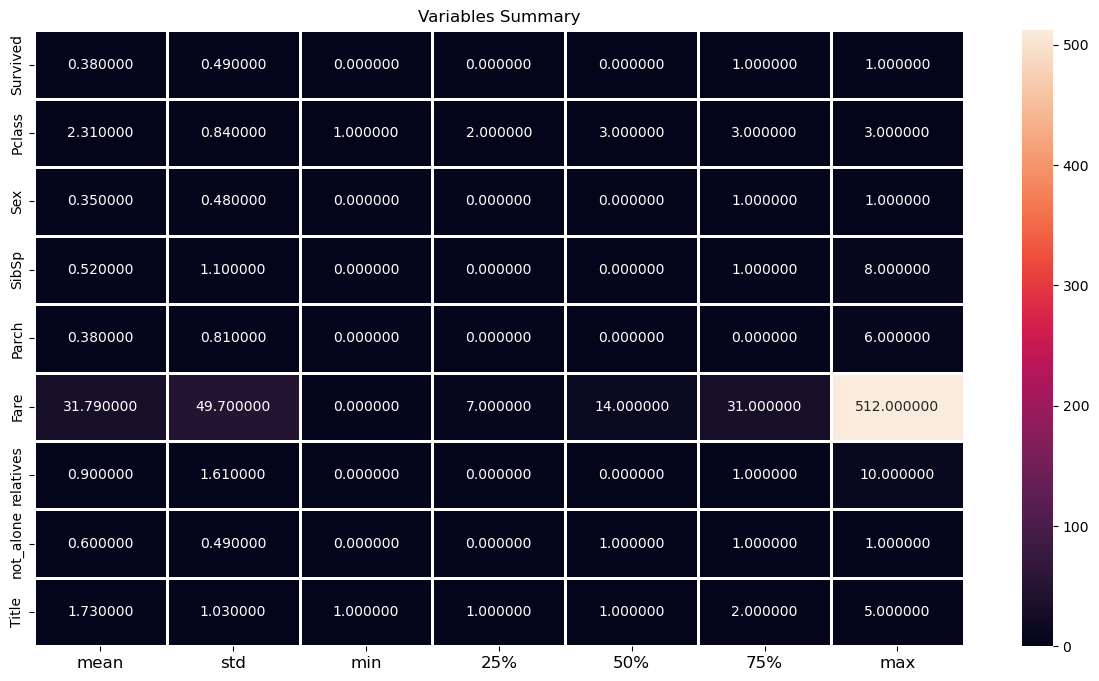

In [67]:
plt.figure(figsize=(15,8))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=15)
plt.xticks(fontsize=12)
plt.title('Variables Summary')
plt.show()

In [68]:
forest=model[6]
importances=pd.DataFrame({'feature':df.iloc[:,1:6].columns,'importance':np.round(forest.feature_importances_,3)})
importances=importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Fare,0.383
Sex,0.354
Pclass,0.123
SibSp,0.071
Parch,0.068


<AxesSubplot:xlabel='feature'>

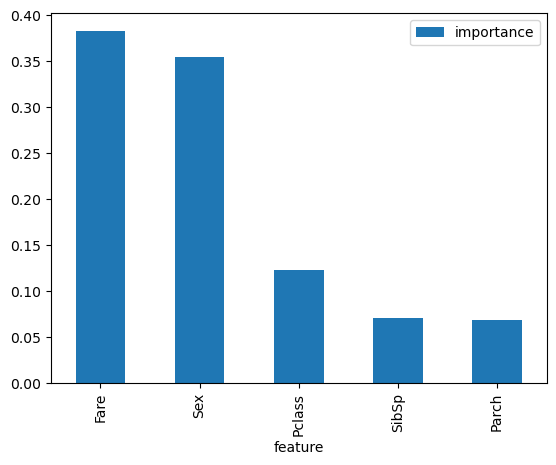

In [69]:
importances.plot.bar()

In [64]:
pred=model[6].predict(X_test)
print(pred)

print()

print(Y_test)

[158 158 165 394 185 431 538 541 454 217 404  57 158 418 538 397 158 315
 158 752 233 538 158 783 397 872 158 217 652 120 158  57 158 431 404 431
 158 233 233 233 249 158 158 165 394 158 158 743 233 746 431 680 802 158
 431 666 783  72 183 126 158 886 394 783 185 158 538 149 802 538 519 454
 337 158 158 601 246 783 158 233 404 349 802 158 233 538 538 217  57 337
 783 158 832 690 120 158 418 165 783 431  60 362 158 596 853 173  57 886
 362 432 158 690 284 397 306  57 432 394 158 802 284 158 158 783 158 783
 158 126 233 233 397 158 158 112 783 158 404 112 362 233 233 394 158 397
  57 397 233 519 690 158 337 217 397 158  57 233 206  22 397 470 158 284
 394 331 596 158 158 158 158 158 158 394 158 158 217 158 394 158 158]

[496 649 279  32 256 299 610 319 485 368 705 347 197 536 311  15 351 146
 615 804 145 709 779 271 475 320 520 142 881 643 286 459 201  56 478 633
 819 884 667 318 588 694 539 687 231 102 657 312 809 263 741  98 751 567
 840 656 253 543 820 302  61 568 497 767   9 891 797 